In [290]:
import io
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sn
import json
from IPython.display import Image
import cufflinks as cf
from IPython.display import display,HTML
import seaborn as sns


# 0. INTRODUCCI√ìN
Tras algo menos de un mes de Bootcamp de Data Science, habiendo repasado todos los bloques principales de programaci√≥n en Python, as√≠ como las principales librer√≠as transversales, esta semana empezamos a trabajar con una herramienta indispensable para cualquier Cient√≠fico de Datos: Pandas.

Tras haber consultado diversos proyectos similiares en diversas fuentes (Ciencia de Datos dede cero, el canal Data Science For Business, entre otros) me propongo analizar la informaci√≥n disponible en mi cuenta de Spotify.

Para ello descargo los datos desde el apartado de Configuraci√≥n de Privacidad de la propia web de Spotify desde: 


    https://www.spotify.com/ad/account/privacy/





## 0.1. Objetivo
Analizar mis patrones de consumo de m√∫sica en la plataforma Spotify, teniendo en cuenta las siguientes variables:

    1. Artistas.
    2. Temas.
    3. G√©neros.
    4. Patrones rutinarios (dentro de un mismo d√≠a).
    5. Patrones temporales.
      



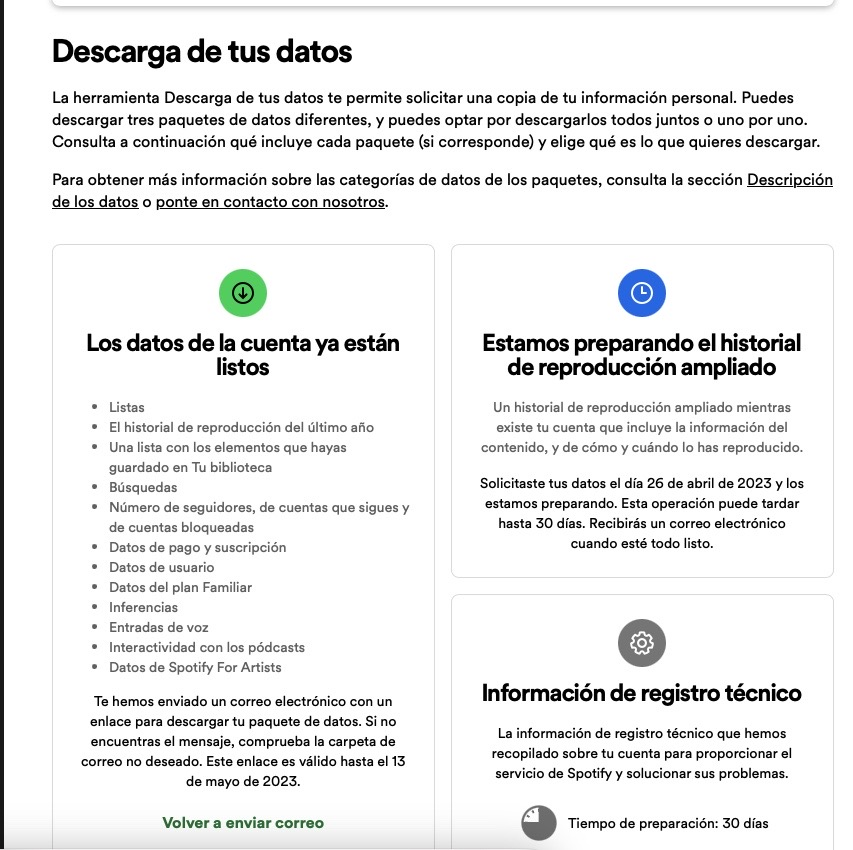

In [2]:
Image("Imagen 3-5-23 a las 9.34.jpeg",width = 600)

# 1. CARGA DE DATOS


## 1.1. Exploraci√≥n de los datos en su origen
Antes de importar los datos a Python, realizo una breve exploraci√≥n previa de la estructura y formato de los archivos descargados, con importantes hallazgos:
    
    1. Los archivos est√°n en formato JSON, lo cual facilitar√° el resto del an√°lisis con PANDAS. Decido subirlos a la misma carpeta donde se encuentra el Jupyter Notebook para simplificar la posterior carga.
    
    
    2. De entre los numerosos archivos incluidos en el paquete descargado, solo dos son de relevancia para los objetivos de este proyecto: 
        
        a) Streaming History (0,1,y 2): incluyen el histor√≠al de reproducci√≥n.
  
  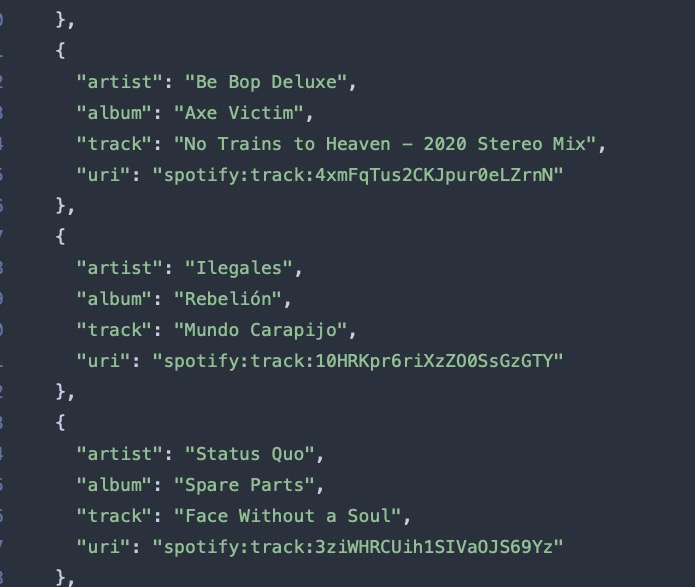
        
        
        b) Your Library: Canciones incluidas en la librer√≠a de la cuenta, siendo rese√±able, que en este archivo se incluyen el √°lbum al que pertenece cada tema.


    3. Es rese√±able que la estructura de los archvios es tipo librer√≠a de Python, lo que previsiblemente facilitar√° fases posteriores del an√°liss 

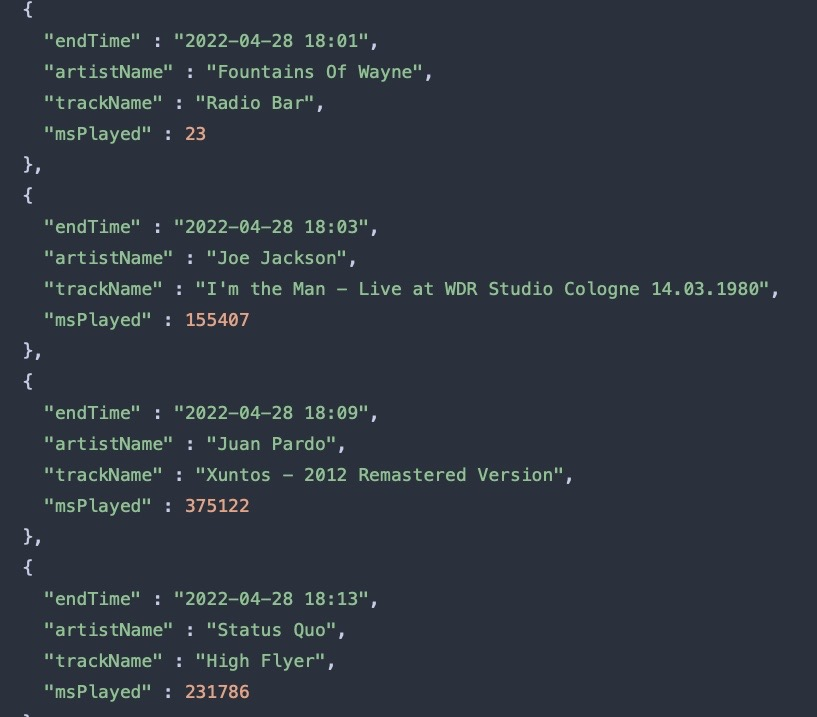

## 1.2 Carga de Datos

In [3]:
df0 = pd.read_json("StreamingHistory0.json")
df1 = pd.read_json("StreamingHistory1.json")
df2 = pd.read_json("StreamingHistory2.json")

La importaci√≥n de los archivos de la Liber√≠a plantearon la dificultad, al tener varios tipos de informaci√≥n almacenada en forma de diccionarios con distinto n√∫mero de elementos, de requerir un m√©todo de importaci√≥n distinto. 

En este caso, se acude a la librer√≠a json (importada en el incio del notebook) para poder extraer unicamente la informaci√≥n requerida de los albumes haci√©ndolo adem√°s en formato diccionarino. Despu√©s almaceno esta informaci√≥n en otra variable.

In [4]:
with open('YourLibrary.json') as f:
    dfl = json.load(f)

Tal como se aprecia, se trata de un diccionario con varios diccionarios dentro. 

In [5]:
type(dfl)

dict

In [6]:
dfl.keys()

dict_keys(['tracks', 'albums', 'shows', 'episodes', 'bannedTracks', 'artists', 'bannedArtists', 'other'])

Ahora tenemos un diccionario del que extraemos unicamente los tracks, que ser√≠an un diccionario dentro de otro diccionario

In [7]:
tracks = dfl.get("tracks")


Igualmente, aprovecho para extraer los episodios de podcast y audiolibros, ya que estos podr√≠amos categorizarlos en nuevas variables en apartados posteriores. Dentro de la base de datos estos se encuentran mal categorizados entre los tipos show y episodes.

In [8]:
episodes = dfl.get("episodes")


In [9]:
shows = dfl.get("shows")


Como √∫ltimo paso, creamos un DataSet de cada uno de estos diccionarios:

In [10]:
dftracks = pd.DataFrame(tracks)
dfepisodes = pd.DataFrame(episodes)
dfshows = pd.DataFrame(shows)
print(dfshows)
print(dfshows)
print(dfepisodes)

                                       name                   publisher  \
0        AUDIOLIBROS COMPLETOS Y EN ESPA√ëOL                      varios   
1                Audiolibros Leyendo Juntos  Audiolibros Leyendo Juntos   
2                     Budismo en Zapatillas              Lucas Casanova   
3                      Club de Lectura CFLC                     CFLCCDL   
4  El libro tibetano de la vida y la muerte                 Roc√≠o Berg√©   
5                         Entiende Tu Mente             Spotify Studios   
6                             La Ducha Fr√≠a               La Ducha Fr√≠a   
7                           Maldini mundial             Spotify (Shows)   
8                              MundoMaldini             Julio Maldonado   
9                          The Wild Project                  Jordi Wild   

                                   uri  
0  spotify:show:4KCRxp20Ib4nskv7MopNVU  
1  spotify:show:2IsUmw25sOsz8UW6gqI5NT  
2  spotify:show:5iJRiRfBTmjAXOMDx2OFD8  
3  sp


# 2. AN√ÅLISIS EXPLORATORIO

Antes de dar comienzo a la exploraci√≥n, vemos informaci√≥n general de cada DF

In [11]:
dfdef = pd.concat([df0, df1, df2], axis=0)  ## Este ser√≠a el Historial de Reproducci√≥n
dfdef

endTime               artistName  \
0     2022-04-03 15:37               The Police   
1     2022-04-27 17:34               Blue Swede   
2     2022-04-28 06:41           Rockabye Baby!   
3     2022-04-28 06:41             Bonnie Tyler   
4     2022-04-28 06:41              The Mystics   
...                ...                      ...   
1100  2023-04-27 20:43  Wolfgang Amadeus Mozart   
1101  2023-04-27 20:43                    Keane   
1102  2023-04-27 20:46             Night Ranger   
1103  2023-04-27 20:47             Night Ranger   
1104  2023-04-27 20:47                Ni√±a Dioz   

                                              trackName  msPlayed  
0     Can't Stand Losing You/Reggatta De Blanc - Liv...      8170  
1                                            Half Breed    159824  
2                                        God Only Knows      5438  
3                            Total Eclipse of the Heart      9150  
4                                              Hushabye      6188  
...                                                 ...       ...  
1100  Don Giovanni, K. 527, Act I Scene 1: Notte e g...     56740  
1101                               Everybody's Changing      2578  
1102                                   Sister Christian    176674  
1103                                   Sister Christian     10313  
1104                                             Brillo     17282  

[21105 rows x 4 columns]

Para evitar incoherencias entre ambas bases, primero cambiamos la nomenclatura de las columnas para que coincidan.

In [12]:
dfepisodes.rename({'show': 'publisher'}, axis=1, inplace = True) ## Nos acordamos de dejar el inplace true para que el cambio sea permanente.

In [13]:
df_podcast = pd.concat([dfshows,dfepisodes], axis=0)  ## Este ser√≠a el Historial de Reproducci√≥n
df_podcast.info

<bound method DataFrame.info of                                                  name  \
0                  AUDIOLIBROS COMPLETOS Y EN ESPA√ëOL   
1                          Audiolibros Leyendo Juntos   
2                               Budismo en Zapatillas   
3                                Club de Lectura CFLC   
4            El libro tibetano de la vida y la muerte   
5                                   Entiende Tu Mente   
6                                       La Ducha Fr√≠a   
7                                     Maldini mundial   
8                                        MundoMaldini   
9                                    The Wild Project   
0   Mindfulness Para Identificar Emociones - Medit...   
1           Meditaciones de Marco Aurelio - Libro VII   
2            Meditaciones de Marco Aurelio - Libro IV   
3   6. C√≥mo Mejorar tus Habilidades Sociales, Empe...   
4           Meditaciones de Marco Aurelio - Libro III   
5             Meditaciones de Marco Aurelio - Libro V

## 2.1. Datos generales
A continuaci√≥n defino unas variables generales para la extracci√≥n de los principales datos de cada DataFrame.

In [14]:
def analisis_DF(x):
    a = x.shape
    b = x.size
    c = x.ndim
    d = x.info()
    return f"{a} filas por culumna, {b} total datos, {c} num. dimensiones. \n Estructura: \n {d}" 
    

In [15]:
def analisis_DF_2(x):
    a = print("INDICES: \n",x.index,"\n")
    b = print("COLUMNAS: \n",x.columns,"\n")
    c = print("VALORES: \n",x.values,"\n)")
  

### a) An√°lisis dfdef

In [16]:
analisis_DF(dfdef)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21105 entries, 0 to 1104
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     21105 non-null  object
 1   artistName  21105 non-null  object
 2   trackName   21105 non-null  object
 3   msPlayed    21105 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 824.4+ KB


'(21105, 4) filas por culumna, 84420 total datos, 2 num. dimensiones. \n Estructura: \n None'

In [17]:
analisis_DF_2(dfdef)

INDICES: 
 Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104],
           dtype='int64', length=21105) 

COLUMNAS: 
 Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object') 

VALORES: 
 [['2022-04-03 15:37' 'The Police'
  "Can't Stand Losing You/Reggatta De Blanc - Live From River Plate Stadium, Buenos Aires"
  8170]
 ['2022-04-27 17:34' 'Blue Swede' 'Half Breed' 159824]
 ['2022-04-28 06:41' 'Rockabye Baby!' 'God Only Knows' 5438]
 ...
 ['2023-04-27 20:46' 'Night Ranger' 'Sister Christian' 176674]
 ['2023-04-27 20:47' 'Night Ranger' 'Sister Christian' 10313]
 ['2023-04-27 20:47' 'Ni√±a Dioz' 'Brillo' 17282]] 
)


### b) An√°lisis dftracks

In [18]:
analisis_DF(dftracks)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  330 non-null    object
 1   album   330 non-null    object
 2   track   330 non-null    object
 3   uri     330 non-null    object
dtypes: object(4)
memory usage: 10.4+ KB


'(330, 4) filas por culumna, 1320 total datos, 2 num. dimensiones. \n Estructura: \n None'

In [19]:
analisis_DF_2(dftracks)

INDICES: 
 RangeIndex(start=0, stop=330, step=1) 

COLUMNAS: 
 Index(['artist', 'album', 'track', 'uri'], dtype='object') 

VALORES: 
 [['Van Dyke Parks' 'The Brave Little Toaster' 'Worthless'
  'spotify:track:5Xg5jpyqv0eL9WPwd9eyip']
 ['Savoy Brown' 'Songs from the Road (Live)' 'Looking In (Live)'
  'spotify:track:0hWQDLdpMsL0JuhQg1DHEV']
 ['Charles Trenet' "Disque D'or" 'La mer'
  'spotify:track:1ZK8WJqkD1XhEYI1AlkMHG']
 ...
 ['Molly Hatchet' "Flirtin' With Disaster" "Flirtin' with Disaster"
  'spotify:track:61BywQA7q8KjpGjp3rHuRv']
 ['Mark Grant' 'Sleep Restore Based on EMDR: Bilateral Stimulation'
  'Sleep Restore Based on EMDR: Bilateral Stimulation'
  'spotify:track:09Q4Q9pmxv4H4hysgCacOa']
 ['George Frideric Handel' 'The Sports Album' 'Zadok The Priest'
  'spotify:track:0VvhyK4OqzSBCCQfVaOV19']] 
)


### c) An√°lisis df_podcast

In [20]:
analisis_DF(df_podcast)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 13
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       24 non-null     object
 1   publisher  24 non-null     object
 2   uri        24 non-null     object
dtypes: object(3)
memory usage: 768.0+ bytes


'(24, 3) filas por culumna, 72 total datos, 2 num. dimensiones. \n Estructura: \n None'

In [21]:
analisis_DF_2(df_podcast)

INDICES: 
 Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
            12, 13],
           dtype='int64') 

COLUMNAS: 
 Index(['name', 'publisher', 'uri'], dtype='object') 

VALORES: 
 [['AUDIOLIBROS COMPLETOS Y EN ESPA√ëOL' 'varios'
  'spotify:show:4KCRxp20Ib4nskv7MopNVU']
 ['Audiolibros Leyendo Juntos' 'Audiolibros Leyendo Juntos'
  'spotify:show:2IsUmw25sOsz8UW6gqI5NT']
 ['Budismo en Zapatillas' 'Lucas Casanova'
  'spotify:show:5iJRiRfBTmjAXOMDx2OFD8']
 ['Club de Lectura CFLC' 'CFLCCDL' 'spotify:show:752aI9gS2vxiozjKYGYgnK']
 ['El libro tibetano de la vida y la muerte' 'Roc√≠o Berg√©'
  'spotify:show:49xARIGeiQWM5LYLECmBMZ']
 ['Entiende Tu Mente' 'Spotify Studios'
  'spotify:show:0sGGLIDnnijRPLef7InllD']
 ['La Ducha Fr√≠a' 'La Ducha Fr√≠a' 'spotify:show:0VyEKIDzZDCPae3iPPmlkg']
 ['Maldini mundial' 'Spotify (Shows)'
  'spotify:show:7uAYqfJm1CCdd1ZsDVnGY3']
 ['MundoMaldini' 'Julio Maldonado' 'spotify:show:0oeeNkn1d6YLO4iYrGjIcL']
 ['The Wild Project' 'J

## 2.2 Detecci√≥n de valores perdidos o nulos

#### Buscamos valores nulos en ambos DF.

In [22]:
nulos1 = dfdef.isnull().sum()
nulos1

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

In [23]:
nulos2 = df_podcast.isnull().sum()
nulos2

name         0
publisher    0
uri          0
dtype: int64

#### Ahora buscamos duplicados:

In [24]:
duplicados1 = dfdef.duplicated().sum()
duplicados1

0

In [25]:
duplicados2 = df_podcast.duplicated().sum()
duplicados2

0

## Conclusiones del an√°lisis

Como conclusines de este an√°lisis, teniendo en cuenta ya la creaci√≥n de variables, extraigo las siguientes conclusiones:
    
    1. Es necesario crear variables con el tiempo con su pertinente tipo de dato, lo que permitir√° obtener nueva informaci√≥n de gran inter√©s (hora de reproducci√≥n, g√©neros preferidos seg√∫n √©poca del a√±o, etc...)
    
    2. Es necesario pasar el tiempo de reproducci√≥n a segundos o minutos.
    
    3. La dfdef no incluye el √°lbum del que procede la canci√≥n, por lo que ser√≠a interesamte encontar la manera de extraerlo de df_podcast.
    
    4. No hay datos gen√©ricos de los artistas (g√©nero, d√©cada, nacionalidad, etc..) por lo que ser√≠a interesante buscar una fuente externa que aporte esta informaci√≥n.
    
    5. Es necesaria una nueva indexaci√≥n de dfdef con valores √∫nicos e intuitivos.
    
    6. No hay valores nulos ni duplicados.
    
   

# 3. CREACION DE NUEVAS VARIABLES

Vamos a crear por un lado variables categ√≥ricas (g√©nero, √°lbum, decada, etc...), y de tiempo (a√±o, mes, semana, d√≠a, tiempo de reproducci√≥n, etc...).

## 3.1 Variables categ√≥ricas

### a) Informaci√≥n asociada a los artistas
Como esta informaci√≥n no est√° disponible en ninguno de los JSON obtenidos de Spotify, descargo los valores √∫nicos de los artistas para despu√©s clasificarlos manualmente tras exportarlos a excel. Como no consigo acceder a ninguna fuente externa con esta informaci√≥n, y realizarlo manualmente supondr√≠a una inversi√≥n enorme de tiempo, de momento decido simplemente crear 4 clases: canciones, audiolibros, podcast, y m√∫sica bilateral (para dormir y meditar).

Para ello, una vez exportada a excel la lista de artistas, separo manualmente los artistas musicales (canciones) del resto, y con una funci√≥n buscarv condicionada asigno las 4 categor√≠as. 



In [26]:
# Primero pasamos a pandas el array convertido tras aplicar unique(), ya que la funci√≥n de exportaci√≥n no funciona con nps 

lista_artistas = dfdef["artistName"].unique()
lt = lista_artistas.tolist() 
lista_export = pd.DataFrame(lt)


In [27]:
lista_export

0
0           The Police
1           Blue Swede
2       Rockabye Baby!
3         Bonnie Tyler
4          The Mystics
...                ...
1315          Pax Gene
1316  Molecular Clouds
1317              Juni
1318      Ever So Blue
1319  Szymon Kowalczyk

[1320 rows x 1 columns]

In [28]:
lista_export.to_excel("lista_artistas.xlsx") 


Una vez exportado, espe aparece en la misma carpeta del Notebook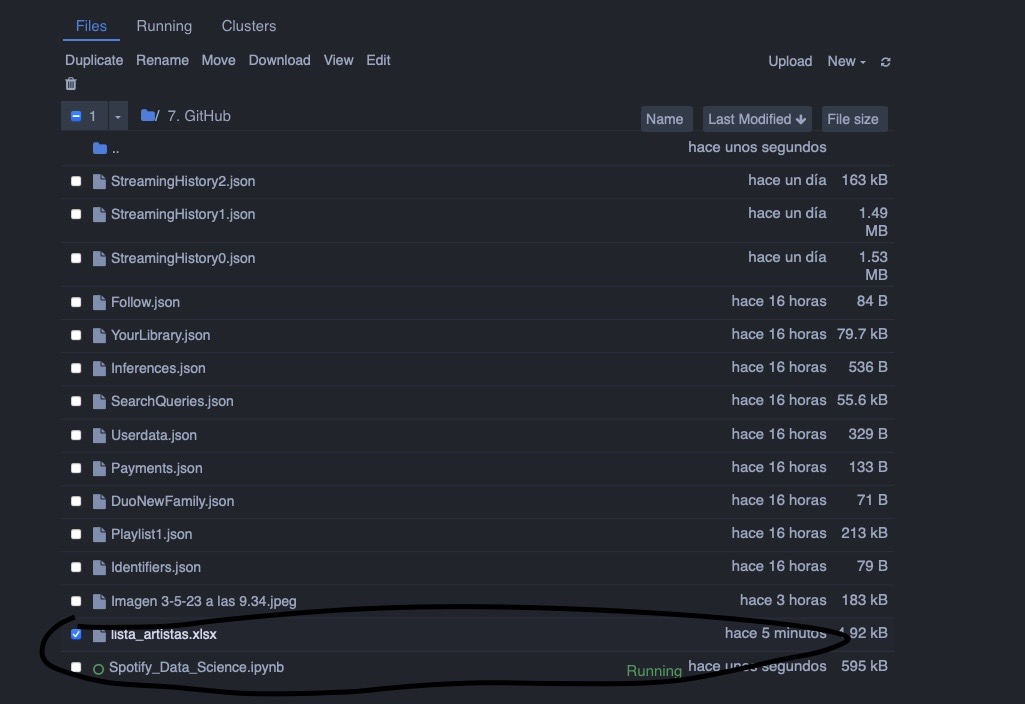

Una vez modificada la lista seg√∫n lo comentado, le cambio el nombre para distinguirla de la exportaci√≥n original. Tambi√©n hago una primera exploraci√≥n de la distribuci√≥n y la informaci√≥n general del libro validar su coherencia.

In [29]:
df_lista_artistas = pd.read_excel("lista_artistas-2.xlsx")
clasificacion_artistas = df_lista_artistas.groupby(["tipo"]).count()
clasificacion_artistas

artista
tipo               
Audiolibro        8
Meditacion      147
Podcast          11

Estos datos son conherentes, pero conviene recordar que los artistas musicales, que tendr√°n asociado el tipo "canciones", ser√°n generados con una funci√≥n "finllna" en pasos posteriores, una vez consolidada la base de datos definitiva.

### b) Asignacion de album a cada cancion

Cambiamos el nombre de track por trackname para que coincida con el de dfdef. Despu√©s lo vamos a utilizar como key para hacer un "buscarV" con dfdef.

In [30]:
dftracks.rename({"track":"trackName"}, axis = 1, inplace = True)
dftracks

artist  \
0            Van Dyke Parks   
1               Savoy Brown   
2            Charles Trenet   
3               Suzi Quatro   
4                   Rosendo   
..                      ...   
325                  Foghat   
326           Carlos Gardel   
327           Molly Hatchet   
328              Mark Grant   
329  George Frideric Handel   

                                                 album  \
0                             The Brave Little Toaster   
1                           Songs from the Road (Live)   
2                                          Disque D'or   
3                                          Suzi Quatro   
4                          Listos Para La Reconversion   
..                                                 ...   
325                     In the Mood for Something Rude   
326                                   El Rey del Tango   
327                             Flirtin' With Disaster   
328  Sleep Restore Based on EMDR: Bilateral Stimula...   
329                                   The Sports Album   

                                             trackName  \
0                                            Worthless   
1                                    Looking In (Live)   
2                                               La mer   
3                                        Daytona Demon   
4                                      El uno por cien   
..                                                 ...   
325  There Ain't No Man That Can't Be Taught - 2016...   
326                             Yira Yira - Remastered   
327                             Flirtin' with Disaster   
328  Sleep Restore Based on EMDR: Bilateral Stimula...   
329                                   Zadok The Priest   

                                      uri  
0    spotify:track:5Xg5jpyqv0eL9WPwd9eyip  
1    spotify:track:0hWQDLdpMsL0JuhQg1DHEV  
2    spotify:track:1ZK8WJqkD1XhEYI1AlkMHG  
3    spotify:track:1Z2Fjryj6vvKQt3tS4CSsX  
4    spotify:track:2hKfTI8nrV2N3XmGnOjUBP  
..                                    ...  
325  spotify:track:3Sj1KQMpDKkjcmlKVg716D  
326  spotify:track:4mGgr5LudKjfxhogUjKf5Q  
327  spotify:track:61BywQA7q8KjpGjp3rHuRv  
328  spotify:track:09Q4Q9pmxv4H4hysgCacOa  
329  spotify:track:0VvhyK4OqzSBCCQfVaOV19  

[330 rows x 4 columns]

A continuaci√≥n consolidamos la informaci√≥n de dfdef con dftracks para obtener toda la informaci√≥n posible de los √°lbumes. El resultado no es satisfactorio.

In [31]:
df_merge = pd.merge(left = dfdef, right = dftracks, on = "trackName", how = "outer")

analisis_DF(df_merge)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21258 entries, 0 to 21257
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   endTime     21252 non-null  object 
 1   artistName  21252 non-null  object 
 2   trackName   21258 non-null  object 
 3   msPlayed    21252 non-null  float64
 4   artist      9073 non-null   object 
 5   album       9073 non-null   object 
 6   uri         9073 non-null   object 
dtypes: float64(1), object(6)
memory usage: 1.3+ MB


'(21258, 7) filas por culumna, 148806 total datos, 2 num. dimensiones. \n Estructura: \n None'

In [32]:
df_merge.sample(5)

endTime              artistName  \
5348   2022-09-03 07:54          Duke Ellington   
1539   2022-06-21 06:32  George Frideric Handel   
12532  2023-03-31 16:22             Suzi Quatro   
4701   2022-05-16 22:40               Aerosmith   
13002  2022-08-05 19:27          Giuseppe Verdi   

                                               trackName  msPlayed  \
5348                                My Little Brown Book    1576.0   
1539   Suite in B-Flat Major, HWV 434: III. Aria con ...  116870.0   
12532                  Four Letter Words - 2017 Remaster     626.0   
4701                                            Mama Kin      23.0   
13002  Otello, Act II Scene 5: Desdemona guilty! (Ote...    1649.0   

                       artist                              album  \
5348           Duke Ellington     Duke Ellington & John Coltrane   
1539   George Frideric Handel                   Handel: 9 Suites   
12532             Suzi Quatro  Suzi‚Ä¶ and Other Four Letter Words   
4701                      NaN                                NaN   
13002                     NaN                                NaN   

                                        uri  
5348   spotify:track:4rmCI9VWrwrJTJ8XQ80BMN  
1539   spotify:track:1AbHHP7mdZfAmNajkEK6cB  
12532  spotify:track:6iPTU8L7r0pM13No7dhX8C  
4701                                    NaN  
13002                                   NaN

Ahora exploramos la existencias de valores nulos (Nan). Simplemente es una informaci√≥n no disponible en los archivos. Cuando un artista escuchado no figura en una de las listas personales almacenadas, no se archiva. Teniendo en cuenta el tipo de dato, tambi√©n se descarta una incompatibilidad entre ambos DataFrame,  y tras revisar la producci√≥n de valores nulos y no nulos, tambi√©n se refuerza esta explicaci√≥n.

In [33]:
df_merge_sa = df_merge[df_merge.msPlayed.notnull()]
df_merge_sa

endTime        artistName  \
0      2022-04-03 15:37        The Police   
1      2023-01-01 14:54        The Police   
2      2022-04-27 17:34        Blue Swede   
3      2022-04-28 18:16        Blue Swede   
4      2022-05-11 06:36        Blue Swede   
...                 ...               ...   
21247  2023-04-26 00:54              Juni   
21248  2023-04-26 00:57      Ever So Blue   
21249  2023-04-26 05:48  Szymon Kowalczyk   
21250  2023-04-27 07:26    Phantom Planet   
21251  2023-04-27 07:46    Phantom Planet   

                                               trackName  msPlayed artist  \
0      Can't Stand Losing You/Reggatta De Blanc - Liv...    8170.0    NaN   
1      Can't Stand Losing You/Reggatta De Blanc - Liv...       0.0    NaN   
2                                             Half Breed  159824.0    NaN   
3                                             Half Breed  171800.0    NaN   
4                                             Half Breed    6327.0    NaN   
...                                                  ...       ...    ...   
21247                                         The Broken  183896.0    NaN   
21248                                              Dvala  177813.0    NaN   
21249                                           Warszawa  137365.0    NaN   
21250                                  California - Demo   10304.0    NaN   
21251                                       Do The Panic   40804.0    NaN   

      album  uri  
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN  
...     ...  ...  
21247   NaN  NaN  
21248   NaN  NaN  
21249   NaN  NaN  
21250   NaN  NaN  
21251   NaN  NaN  

[21252 rows x 7 columns]

In [34]:
nulos_merge = df_merge_sa.isnull().sum()
nonulos_merge = df_merge_sa.notnull().sum()
print("Analisis de nulos \n", nulos_merge)
print("\nAnalisis de nulos \n",nonulos_merge)

Analisis de nulos 
 endTime           0
artistName        0
trackName         0
msPlayed          0
artist        12185
album         12185
uri           12185
dtype: int64

Analisis de nulos 
 endTime       21252
artistName    21252
trackName     21252
msPlayed      21252
artist         9067
album          9067
uri            9067
dtype: int64


A continuaci√≥n exploramos la distribuci√≥n de la informaci√≥n disponible. Resulta coherente.

In [35]:
df_merge_sa.sort_values(["msPlayed"]).head(25)


endTime                         artistName  \
18798  2023-01-11 21:16                          Miura Jam   
14588  2023-04-21 06:07                               UB40   
9000   2022-12-01 14:34                              Karil   
18442  2022-12-31 02:05                         Status Quo   
10464  2023-02-27 09:04                             Foghat   
8995   2022-12-01 14:34                         La Guardia   
14596  2022-09-19 21:55  Big Brother & The Holding Company   
7586   2022-10-07 05:56                             Foghat   
8990   2022-12-01 14:34           Enrique Santos Disc√©polo   
5642   2023-03-13 16:03                        Suzi Quatro   
8985   2022-12-01 14:34                       Oscar Aleman   
8980   2022-12-01 14:34                       Los Ronaldos   
7589   2022-10-07 06:16                             Foghat   
7590   2022-10-07 06:16                             Foghat   
6830   2023-01-08 12:15                               Obus   
8967   2022-12-01 14:34                Joan Baptista Humet   
1774   2022-05-03 21:35                           Ilegales   
18440  2022-12-31 02:05                      Francis Rossi   
5644   2023-03-14 08:55                        Suzi Quatro   
6802   2022-10-17 16:49                   The Pinker Tones   
15362  2022-09-29 22:44                            Rosendo   
7133   2022-06-14 06:41                       Led Zeppelin   
11148  2022-08-08 07:00                    Siniestro Total   
8953   2022-12-01 14:34                           Ilegales   
715    2022-04-29 06:20                 Domenico Scarlatti   

                                              trackName  msPlayed  \
18798  Butter-Fly (From "Digimon Adventure") [Japanese]       0.0   
14588           (I Can't Help) Falling In Love With You       0.0   
9000                 Caballo Homosexual De Las Monta√±as       0.0   
18442           Ol' Rag Blues - Alternate Vocal Version       0.0   
10464                            Home in My Hand - Live       0.0   
8995                               Cuando Brille el Sol       0.0   
14596                                 Piece of My Heart       0.0   
7586                       Zig-Zag Walk - 2016 Remaster       0.0   
8990                                          El choclo       0.0   
5642                                          Rock Hard       0.0   
8985                                  Tico Tico No Fuba       0.0   
8980                              No Puedo Vivir Sin Ti       0.0   
7589                       Zig-Zag Walk - 2016 Remaster       0.0   
7590                       Zig-Zag Walk - 2016 Remaster       0.0   
6830                                       Que te jodan       0.0   
8967                                            Miradla       0.0   
1774         Vivir sin novia ni reloj (feat. Carlangas)       0.0   
18440                   I Wonder Why - Extended Version       0.0   
5644                                          Rock Hard       0.0   
6802                                          Sampleame       0.0   
15362                                   El Asa del Cubo       0.0   
7133               Good Times Bad Times - 1993 Remaster       0.0   
11148                                          Xabaguai       0.0   
8953                     Despierta en el planeta diario       0.0   
715                           Sonata in A Major, K. 211       0.0   

                                  artist  \
18798                          Miura Jam   
14588                               UB40   
9000                                 NaN   
18442                         Status Quo   
10464                                NaN   
8995                                 NaN   
14596  Big Brother & The Holding Company   
7586                              Foghat   
8990                                 NaN   
5642                         Suzi Quatro   
8985                                 NaN   
8980                                 NaN   
7589                              

In [36]:
ax1 = df_merge_sa.groupby("album").count()
ax2 = ax1.sort_values("album").head(10)
ax2

endTime  artistName  \
album                                                                     
"Feel Flows" The Sunflower & Surf‚Äôs Up Sessions...       40          40   
1+9+8+2                                                  23          23   
20 Hits of Carlos Gardel                                 24          24   
461 Ocean Boulevard                                      23          23   
A Beautiful Mind                                         42          42   
A Las Lombrices                                          56          56   
A Prop√≥sito de Miguel Hern√°ndez, un Poeta de Or...      191         191   
A Step Further                                           16          16   
A veces cuesta llegar al estribillo                      47          47   
Adam Brand And The Outlaws                                8           8   

                                                    trackName  msPlayed  \
album                                                                     
"Feel Flows" The Sunflower & Surf‚Äôs Up Sessions...         40        40   
1+9+8+2                                                    23        23   
20 Hits of Carlos Gardel                                   24        24   
461 Ocean Boulevard                                        23        23   
A Beautiful Mind                                           42        42   
A Las Lombrices                                            56        56   
A Prop√≥sito de Miguel Hern√°ndez, un Poeta de Or...        191       191   
A Step Further                                             16        16   
A veces cuesta llegar al estribillo                        47        47   
Adam Brand And The Outlaws                                  8         8   

                                                    artist  uri  
album                                                            
"Feel Flows" The Sunflower & Surf‚Äôs Up Sessions...      40   40  
1+9+8+2                                                 23   23  
20 Hits of Carlos Gardel                                24   24  
461 Ocean Boulevard                                     23   23  
A Beautiful Mind                                        42   42  
A Las Lombrices                                         56   56  
A Prop√≥sito de Miguel Hern√°ndez, un Poeta de Or...     191  191  
A Step Further                                          16   16  
A veces cuesta llegar al estribillo                     47   47  
Adam Brand And The Outlaws                               8    8

## 3.2 Variables temporales
En este apartado vamos obtener informaci√≥n temporal desde la columna endTime.

In [37]:
df_merge_sa["endTime"] = pd.to_datetime(df_merge_sa["endTime"])
df_merge_sa

endTime        artistName  \
0     2022-04-03 15:37:00        The Police   
1     2023-01-01 14:54:00        The Police   
2     2022-04-27 17:34:00        Blue Swede   
3     2022-04-28 18:16:00        Blue Swede   
4     2022-05-11 06:36:00        Blue Swede   
...                   ...               ...   
21247 2023-04-26 00:54:00              Juni   
21248 2023-04-26 00:57:00      Ever So Blue   
21249 2023-04-26 05:48:00  Szymon Kowalczyk   
21250 2023-04-27 07:26:00    Phantom Planet   
21251 2023-04-27 07:46:00    Phantom Planet   

                                               trackName  msPlayed artist  \
0      Can't Stand Losing You/Reggatta De Blanc - Liv...    8170.0    NaN   
1      Can't Stand Losing You/Reggatta De Blanc - Liv...       0.0    NaN   
2                                             Half Breed  159824.0    NaN   
3                                             Half Breed  171800.0    NaN   
4                                             Half Breed    6327.0    NaN   
...                                                  ...       ...    ...   
21247                                         The Broken  183896.0    NaN   
21248                                              Dvala  177813.0    NaN   
21249                                           Warszawa  137365.0    NaN   
21250                                  California - Demo   10304.0    NaN   
21251                                       Do The Panic   40804.0    NaN   

      album  uri  
0       NaN  NaN  
1       NaN  NaN  
2       NaN  NaN  
3       NaN  NaN  
4       NaN  NaN  
...     ...  ...  
21247   NaN  NaN  
21248   NaN  NaN  
21249   NaN  NaN  
21250   NaN  NaN  
21251   NaN  NaN  

[21252 rows x 7 columns]

In [38]:
df_merge_sa.dtypes

endTime       datetime64[ns]
artistName            object
trackName             object
msPlayed             float64
artist                object
album                 object
uri                   object
dtype: object

In [39]:
df_merge_sa.set_index("endTime", inplace = True)
df_merge_sa


artistName  \
endTime                                 
2022-04-03 15:37:00        The Police   
2023-01-01 14:54:00        The Police   
2022-04-27 17:34:00        Blue Swede   
2022-04-28 18:16:00        Blue Swede   
2022-05-11 06:36:00        Blue Swede   
...                               ...   
2023-04-26 00:54:00              Juni   
2023-04-26 00:57:00      Ever So Blue   
2023-04-26 05:48:00  Szymon Kowalczyk   
2023-04-27 07:26:00    Phantom Planet   
2023-04-27 07:46:00    Phantom Planet   

                                                             trackName  \
endTime                                                                  
2022-04-03 15:37:00  Can't Stand Losing You/Reggatta De Blanc - Liv...   
2023-01-01 14:54:00  Can't Stand Losing You/Reggatta De Blanc - Liv...   
2022-04-27 17:34:00                                         Half Breed   
2022-04-28 18:16:00                                         Half Breed   
2022-05-11 06:36:00                                         Half Breed   
...                                                                ...   
2023-04-26 00:54:00                                         The Broken   
2023-04-26 00:57:00                                              Dvala   
2023-04-26 05:48:00                                           Warszawa   
2023-04-27 07:26:00                                  California - Demo   
2023-04-27 07:46:00                                       Do The Panic   

                     msPlayed artist album  uri  
endTime                                          
2022-04-03 15:37:00    8170.0    NaN   NaN  NaN  
2023-01-01 14:54:00       0.0    NaN   NaN  NaN  
2022-04-27 17:34:00  159824.0    NaN   NaN  NaN  
2022-04-28 18:16:00  171800.0    NaN   NaN  NaN  
2022-05-11 06:36:00    6327.0    NaN   NaN  NaN  
...                       ...    ...   ...  ...  
2023-04-26 00:54:00  183896.0    NaN   NaN  NaN  
2023-04-26 00:57:00  177813.0    NaN   NaN  NaN  
2023-04-26 05:48:00  137365.0    NaN   NaN  NaN  
2023-04-27 07:26:00   10304.0    NaN   NaN  NaN  
2023-04-27 07:46:00   40804.0    NaN   NaN  NaN  

[21252 rows x 6 columns]

In [40]:
def atributos_fechas(x):
    x['a√±o'] = x.index.year
    x['mes'] = x.index.month_name()
    x['dia_mes'] = x.index.day
    x['dia_semana'] = x.index.day_name()
    x['hora'] = x.index.hour
    return(x)

In [41]:
df_EST = atributos_fechas(df_merge_sa)
df_EST

artistName  \
endTime                                 
2022-04-03 15:37:00        The Police   
2023-01-01 14:54:00        The Police   
2022-04-27 17:34:00        Blue Swede   
2022-04-28 18:16:00        Blue Swede   
2022-05-11 06:36:00        Blue Swede   
...                               ...   
2023-04-26 00:54:00              Juni   
2023-04-26 00:57:00      Ever So Blue   
2023-04-26 05:48:00  Szymon Kowalczyk   
2023-04-27 07:26:00    Phantom Planet   
2023-04-27 07:46:00    Phantom Planet   

                                                             trackName  \
endTime                                                                  
2022-04-03 15:37:00  Can't Stand Losing You/Reggatta De Blanc - Liv...   
2023-01-01 14:54:00  Can't Stand Losing You/Reggatta De Blanc - Liv...   
2022-04-27 17:34:00                                         Half Breed   
2022-04-28 18:16:00                                         Half Breed   
2022-05-11 06:36:00                                         Half Breed   
...                                                                ...   
2023-04-26 00:54:00                                         The Broken   
2023-04-26 00:57:00                                              Dvala   
2023-04-26 05:48:00                                           Warszawa   
2023-04-27 07:26:00                                  California - Demo   
2023-04-27 07:46:00                                       Do The Panic   

                     msPlayed artist album  uri   a√±o      mes  dia_mes  \
endTime                                                                   
2022-04-03 15:37:00    8170.0    NaN   NaN  NaN  2022    April        3   
2023-01-01 14:54:00       0.0    NaN   NaN  NaN  2023  January        1   
2022-04-27 17:34:00  159824.0    NaN   NaN  NaN  2022    April       27   
2022-04-28 18:16:00  171800.0    NaN   NaN  NaN  2022    April       28   
2022-05-11 06:36:00    6327.0    NaN   NaN  NaN  2022      May       11   
...                       ...    ...   ...  ...   ...      ...      ...   
2023-04-26 00:54:00  183896.0    NaN   NaN  NaN  2023    April       26   
2023-04-26 00:57:00  177813.0    NaN   NaN  NaN  2023    April       26   
2023-04-26 05:48:00  137365.0    NaN   NaN  NaN  2023    April       26   
2023-04-27 07:26:00   10304.0    NaN   NaN  NaN  2023    April       27   
2023-04-27 07:46:00   40804.0    NaN   NaN  NaN  2023    April       27   

                    dia_semana  hora  
endTime                               
2022-04-03 15:37:00     Sunday    15  
2023-01-01 14:54:00     Sunday    14  
2022-04-27 17:34:00  Wednesday    17  
2022-04-28 18:16:00   Thursday    18  
2022-05-11 06:36:00  Wednesday     6  
...                        ...   ...  
2023-04-26 00:54:00  Wednesday     0  
2023-04-26 00:57:00  Wednesday     0  
2023-04-26 05:48:00  Wednesday     5  
2023-04-27 07:26:00   Thursday     7  
2023-04-27 07:46:00   Thursday     7  

[21252 rows x 11 columns]

Ahora pasamos a segundos los ms.

In [42]:
df_EST["msPlayed"] = df_EST["msPlayed"]/1000

In [43]:
df_EST.head(5)

artistName  \
endTime                           
2022-04-03 15:37:00  The Police   
2023-01-01 14:54:00  The Police   
2022-04-27 17:34:00  Blue Swede   
2022-04-28 18:16:00  Blue Swede   
2022-05-11 06:36:00  Blue Swede   

                                                             trackName  \
endTime                                                                  
2022-04-03 15:37:00  Can't Stand Losing You/Reggatta De Blanc - Liv...   
2023-01-01 14:54:00  Can't Stand Losing You/Reggatta De Blanc - Liv...   
2022-04-27 17:34:00                                         Half Breed   
2022-04-28 18:16:00                                         Half Breed   
2022-05-11 06:36:00                                         Half Breed   

                     msPlayed artist album  uri   a√±o      mes  dia_mes  \
endTime                                                                   
2022-04-03 15:37:00     8.170    NaN   NaN  NaN  2022    April        3   
2023-01-01 14:54:00     0.000    NaN   NaN  NaN  2023  January        1   
2022-04-27 17:34:00   159.824    NaN   NaN  NaN  2022    April       27   
2022-04-28 18:16:00   171.800    NaN   NaN  NaN  2022    April       28   
2022-05-11 06:36:00     6.327    NaN   NaN  NaN  2022      May       11   

                    dia_semana  hora  
endTime                               
2022-04-03 15:37:00     Sunday    15  
2023-01-01 14:54:00     Sunday    14  
2022-04-27 17:34:00  Wednesday    17  
2022-04-28 18:16:00   Thursday    18  
2022-05-11 06:36:00  Wednesday     6

## 3.3 Consolidaci√≥n de la Data Frame definitiva
Se procede a consolidar la informaci√≥n categ√≥rica realizada en el apartado 3.1 con la informaci√≥n temporal obtenida del apartado 3.2, para despu√©s revisar la coherencia del DataFrame definitivo y eliminar la informaci√≥n no necesaria.

En primer lugar renombramos la columna artista de df_lista_artistas a fin de que coincida con el de df_DEF:
 

In [44]:
df_lista_artistas.rename({"artista":"artistName"}, axis = 1, inplace = True)

In [45]:
df_EST.sample(1)

artistName                         trackName  msPlayed  \
endTime                                                                        
2022-09-05 09:43:00  Suzi Quatro  Heartbreak Hotel - 2017 Remaster    50.711   

                          artist         album  \
endTime                                          
2022-09-05 09:43:00  Suzi Quatro  Aggro-Phobia   

                                                      uri   a√±o        mes  \
endTime                                                                      
2022-09-05 09:43:00  spotify:track:2R45WnMz09Hztdds47KGuw  2022  September   

                     dia_mes dia_semana  hora  
endTime                                        
2022-09-05 09:43:00        5     Monday     9

In [46]:
df_lista_artistas.sample(1)

artistName        tipo
157  The Good Spirit  Meditacion

In [47]:
df_CONS = pd.merge(left = df_EST, right = df_lista_artistas, on = "artistName", how = "outer")
df_CONS.sample(5)

artistName  \
13524  Ludwig van Beethoven   
11624               Rosendo   
15115               Roxette   
2068             Geek Music   
13182           Suzi Quatro   

                                               trackName  msPlayed  \
13524  Piano Sonata No. 6 In F Major, Op. 10, No. 2: ...   244.333   
11624                                       ¬øQue Me Das?    12.593   
15115                               Listen To Your Heart     3.827   
2068                         The Good Fight - Main Theme     1.721   
13182                  Four Letter Words - 2017 Remaster    12.992   

            artist                              album  \
13524          NaN                                NaN   
11624      Rosendo                    A Las Lombrices   
15115          NaN                                NaN   
2068    Geek Music        The Good Fight - Main Theme   
13182  Suzi Quatro  Suzi‚Ä¶ and Other Four Letter Words   

                                        uri   a√±o    mes  dia_mes dia_semana  \
13524                                   NaN  2022   June       20     Monday   
11624  spotify:track:02YywYsVPatPJWVZhmLbY6  2023  April       11    Tuesday   
15115                                   NaN  2022   June       13     Monday   
2068   spotify:track:1BlDofyPNllAa6FrQPzdkb  2022   July        6  Wednesday   
13182  spotify:track:6iPTU8L7r0pM13No7dhX8C  2023  March        5     Sunday   

       hora tipo  
13524     6  NaN  
11624    20  NaN  
15115    18  NaN  
2068     10  NaN  
13182     3  NaN

Revisado el DataFrame definitivo, se procede a eliminar las columnas innecesarias, y despu√©s a substituir los valores de NaN de la coumna tipo con canci√≥n, ya que el resto ya se categorizaron en el punto 3.1 en uno de los restantes tipos en funci√≥n del artista (Podcast, audiolibros, o m√∫sica bilateral.

In [48]:
df_CONS.drop(["artist","uri"], axis = 1, inplace = True)

In [49]:
df_CONS.fillna("cancion", inplace = True)

In [50]:
df_CONS.rename({"artistName":"artista","trackName":"tema","msPlayed":"Segundos"}, axis = 1, inplace = True)

In [51]:
df_CONS.sample(10)

artista  \
687                   Bonnie Tyler   
17348             Suburban Legends   
19323                       Janice   
4647                    Status Quo   
18035  The Retrosettes Sister Band   
3373                    Status Quo   
8833                 Be Bop Deluxe   
20959  Christone "Kingfish" Ingram   
1958     Sonny Til and The Orioles   
10512      Wolfgang Amadeus Mozart   

                                                    tema  Segundos  \
687                           Total Eclipse of the Heart    12.887   
17348                                         Duck Tales     0.405   
19323                                   My Kind Of Woman     1.068   
4647                               Rock 'n' Roll 'n' You   200.376   
18035                                   You Got The Love     2.482   
3373                                          High Flyer     0.392   
8833               No Trains to Heaven - 2020 Stereo Mix     4.384   
20959                              Empty Promises - Live     0.404   
1958                                Crying in the Chapel     5.805   
10512  Piano Sonata No. 1 in C Major, K. 279: I. Allegro     6.306   

                                                 album   a√±o       mes  \
687                                            cancion  2022  November   
17348  Dreams Aren't Real, But These Songs Are, Vol. 1  2023  February   
19323                                  The Playlist EP  2022  December   
4647                                           cancion  2023     March   
18035                Youth (Original Soundtrack Album)  2022    August   
3373                                 Whatever You Want  2022      June   
8833                                        Axe Victim  2023     March   
20959                                   Empty Promises  2023     March   
1958                                           cancion  2022     April   
10512                            Mozart: Piano Sonatas  2022      June   

       dia_mes dia_semana  hora     tipo  
687         25     Friday    19  cancion  
17348       27     Monday     9  cancion  
19323        9     Friday     7  cancion  
4647         7    Tuesday     8  cancion  
18035       23    Tuesday    16  cancion  
3373        18   Saturday    14  cancion  
8833         1  Wednesday    15  cancion  
20959       14    Tuesday     8  cancion  
1958        28   Thursday     6  cancion  
10512        1  Wednesday    21  cancion

 # 4. AN√ÅLISIS DE DATOS

A continuaci√≥n pasamos a analizar la informaci√≥n extra√≠da y consolidada en df_CONS

 ## 4.1  Canciones y artistas pasados
 En este punto se estudia el tiempo de reproducci√≥n de las canciones, a fin de diferenciar reproducciones no funcionales, constituidas principalmente por salto a siguientes canciones en un dispositivo por no tener acceso a la totalidad de las funciones de la aplicaci√≥n principal.

Como primer paso,  vamos a filtrar todas las reproducciones inferiores a 45 segundos para obtener datos de las reproducciones signigicativas:

In [52]:
rep_45 = df_CONS["Segundos"] >= 45 ### primero creamos la condici√≥n
df_CONS_45 = df_CONS[rep_45]
df_CONS_45


artista                 tema  Segundos    album   a√±o    mes  \
4            The Police    Reggatta De Blanc    50.537  cancion  2022   June   
9            Blue Swede           Half Breed   159.824  cancion  2022  April   
10           Blue Swede           Half Breed   171.800  cancion  2022  April   
28           Blue Swede  Hooked On A Feeling   149.642  cancion  2022    May   
29           Blue Swede  Hooked On A Feeling   172.867  cancion  2022    May   
...                 ...                  ...       ...      ...   ...    ...   
21247          Pax Gene               Sapnis   217.000  cancion  2023  April   
21248  Molecular Clouds      Finally At Ease   160.000  cancion  2023  April   
21249              Juni           The Broken   183.896  cancion  2023  April   
21250      Ever So Blue                Dvala   177.813  cancion  2023  April   
21251  Szymon Kowalczyk             Warszawa   137.365  cancion  2023  April   

       dia_mes dia_semana  hora     tipo  
4           17     Friday    18  cancion  
9           27  Wednesday    17  cancion  
10          28   Thursday    18  cancion  
28          12   Thursday     6  cancion  
29          12   Thursday     6  cancion  
...        ...        ...   ...      ...  
21247       26  Wednesday     0  cancion  
21248       26  Wednesday     0  cancion  
21249       26  Wednesday     0  cancion  
21250       26  Wednesday     0  cancion  
21251       26  Wednesday     5  cancion  

[7888 rows x 10 columns]

Ahora analizo las reproducciones inferiores a cinco segundos. Por lo general suele tratarse de b√∫squeda de una canci√≥n concreta, en los que o bien el  dispositivo (SmartWatch, iPhone) o la situaci√≥n (caminando al trabajo, conduciendo, haciendo deporte) no  permiten hacer una selecci√≥n precisa de la canci√≥n buscada, por lo que simplemente pulso "siguiete" o "anterior" en la lista de reproducci√≥n.


In [53]:
df_pasado = df_CONS["Segundos"] <= 5
df_CONS_5 = df_CONS[df_pasado]
df_CONS_5.sample(5)

artista  \
13520   Ludwig van Beethoven   
5877   Johann Sebastian Bach   
1203                    Rush   
6752                  Foghat   
1400                    Rush   

                                                    tema  Segundos    album  \
13520  Piano Sonata No. 5 In C Minor, Op. 10, No. 1: ...     2.966  cancion   
5877   French Suite No. 4 in E-Flat Major, BWV 815: V...     1.630  cancion   
1203           Entre Nous - Snakes & Arrows Live Version     2.885  cancion   
6752                       Drivin' Wheel - 2016 Remaster     0.000  cancion   
1400                            The Pass - 2013 Remaster     2.190  cancion   

        a√±o       mes  dia_mes dia_semana  hora     tipo  
13520  2022      June       20     Monday     6  cancion  
5877   2022       May       16     Monday    17  cancion  
1203   2022  November       12   Saturday    12  cancion  
6752   2023     March       31     Friday     8  cancion  
1400   2023   January       23     Monday     8  cancion

In [54]:
por_ayc = df_CONS_5.groupby(["artista","tema"])["tema"].count()
por_ayc2 = por_ayc.sort_values().tail(20)
por_ayc2


artista                  tema                                                    
Gregory Porter           Hey Laura                                                   28
Luna Picoli Truffaut     Get Me Away from Here, I'm Dying                            28
Rick Wakeman             Life On Mars                                                29
Amie Doherty             A Life Without Limitations                                  29
Wolfgang Amadeus Mozart  Piano Concerto No. 15 in B Flat Major, Kv 450 2. Andante    29
Lorne Balfe              Guernica                                                    30
Duke Ellington           My Little Brown Book                                        31
Michio Miyagi            Haro no Umi (for Violin and Harp)                           31
Ilegales                 La Vida Es Fuego                                            31
George Gershwin          Rhapsody in Blue                                            33
Joe Jackson              Be My Number 

In [55]:
por_a = df_CONS_5.groupby("artista")["tema"].count()
por_a2 = por_a.sort_values().tail(2
por_a2.info

<bound method Series.info of artista
Jean-Philippe Rameau         72
Javier Bergia                78
EMDR                         86
Lorne Balfe                  96
Eagles                       97
Johann Sebastian Bach       104
Savoy Brown                 157
Electric Light Orchestra    159
Wolfgang Amadeus Mozart     160
Joe Jackson                 172
Carlos Gardel               180
The Beach Boys              188
Be Bop Deluxe               189
Rosendo                     224
Ilegales                    280
George Frideric Handel      357
Foghat                      397
Suzi Quatro                 407
Rush                        411
Status Quo                  993
Name: tema, dtype: int64>

Como es de esperar, se corresponden direcatamete con artistas y canciones presentes en las principales listas personales escuchadas.

In [339]:
sns.countplot(data = por_a2, x = 'artista', hue = 'tipo', palette= 'pastel');

ValueError: Could not interpret input 'artista'

In [56]:
por_a2.iplot(kind='bar', color='lightgreen',
                           xTitle='Artista', yTitle='Siguientes',
                           title='Artistas m√°s pasados')

A continuaci√≥n se represetan los datos en funci√≥n de variables temporales y de tipo de reproducci√≥n:

In [57]:
por_hora = df_CONS_5.groupby(["hora","tipo"])["tema"].count()
por_hora = por_hora.to_frame()
por_hora

tema
hora tipo            
0    Meditacion     8
     cancion      239
1    cancion       47
2    cancion      144
3    cancion       94
4    Meditacion     1
     cancion       40
5    Meditacion     1
     cancion       79
6    Meditacion     3
     cancion      707
7    Meditacion    22
     cancion      701
8    Meditacion    12
     cancion      330
9    Meditacion     3
     cancion      156
10   Meditacion     5
     Podcast        1
     cancion      529
11   Meditacion    18
     cancion      391
12   Meditacion     4
     cancion      267
13   Meditacion     9
     cancion      333
14   Audiolibro     1
     Meditacion    10
     cancion      767
15   Meditacion     6
     cancion      458
16   Meditacion    20
     cancion      539
17   Meditacion     3
     Podcast        1
     cancion      423
18   Meditacion    11
     cancion      584
19   Meditacion     9
     cancion      601
20   Meditacion     6
     cancion      483
21   Audiolibro     1
     Meditacion    16
     cancion      608
22   Audiolibro     3
     Meditacion     6
     Podcast        1
     cancion      187
23   Meditacion    15
     cancion      252

In [58]:

por_hora2 = por_hora.T
por_hora2.iplot(kind='bar', xTitle='Years', yTitle='Population', title='Population (1955-2020)')

 ## 4.2  Artistas m√°s escuchados
  

In [289]:
df_CONS_45

artista                 tema  Segundos    album   a√±o    mes  \
4            The Police    Reggatta De Blanc    50.537  cancion  2022   June   
9            Blue Swede           Half Breed   159.824  cancion  2022  April   
10           Blue Swede           Half Breed   171.800  cancion  2022  April   
28           Blue Swede  Hooked On A Feeling   149.642  cancion  2022    May   
29           Blue Swede  Hooked On A Feeling   172.867  cancion  2022    May   
...                 ...                  ...       ...      ...   ...    ...   
21247          Pax Gene               Sapnis   217.000  cancion  2023  April   
21248  Molecular Clouds      Finally At Ease   160.000  cancion  2023  April   
21249              Juni           The Broken   183.896  cancion  2023  April   
21250      Ever So Blue                Dvala   177.813  cancion  2023  April   
21251  Szymon Kowalczyk             Warszawa   137.365  cancion  2023  April   

       dia_mes dia_semana  hora     tipo  
4           17     Friday    18  cancion  
9           27  Wednesday    17  cancion  
10          28   Thursday    18  cancion  
28          12   Thursday     6  cancion  
29          12   Thursday     6  cancion  
...        ...        ...   ...      ...  
21247       26  Wednesday     0  cancion  
21248       26  Wednesday     0  cancion  
21249       26  Wednesday     0  cancion  
21250       26  Wednesday     0  cancion  
21251       26  Wednesday     5  cancion  

[7888 rows x 10 columns]

<AxesSubplot:xlabel='mes', ylabel='count'>

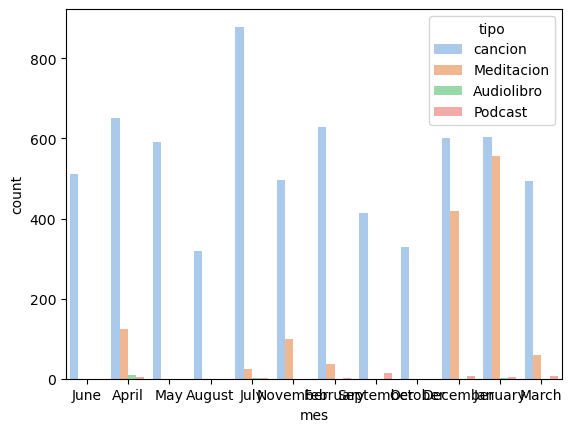

In [291]:
sns.countplot(data = df_CONS_45, x = 'mes', hue = 'tipo', palette= 'pastel')

In [266]:
filtro_artistas = df_CONS_45["tipo"] == "cancion"
top_artistas = df_CONS_45[filtro_artistas]
top_artistas = top_artistas.groupby("artista")["Segundos"].sum()
top_artistas = top_artistas.to_frame()
top_artistas = top_artistas.astype(float)
top_artistas = top_artistas.sort_values("Segundos").tail(20)

In [267]:
top_artistas

Segundos
artista                             
Patrick Page               11470.783
Santana                    11732.764
Carlos Gardel              14588.953
Eagles                     16033.209
The Beach Boys             19711.703
Suzi Quatro                20448.168
Savoy Brown                20723.734
Joe Jackson                22341.640
The Wild Project           22456.638
Be Bop Deluxe              26130.475
Javier Bergia              31903.700
Wolfgang Amadeus Mozart    33341.602
Rosendo                    33742.824
La Ducha Fr√≠a              35844.890
George Frideric Handel     36446.642
Rush                       36650.479
Electric Light Orchestra   40600.062
Ilegales                   40734.676
Foghat                     77676.454
Status Quo                130318.762

In [268]:
top_artistas.iplot(kind='bar',labels='country', values='2020', title="Artistas m√°s escuchados")

In [223]:
o


In [224]:
top_escuchados_num.iplot(kind='bar')

In [225]:
top_escuchados_sum.iplot(kind='bar')

In [246]:
filtro_cancion = df_CONS_45["tipo"] == "cancion"
top_cancion = df_CONS_45[filtro_cancion]
top_cancion = top_cancion.groupby(["tema","artista"])["Segundos"].count()
top_cancion = top_cancion.to_frame()
top_cancion = top_cancion.astype(float)
top_cancion = top_cancion.sort_values("Segundos").tail(20)


In [247]:
top_cancion.iplot(kind='bar')

In [211]:
filtro_podcast = df_CONS_45["tipo"] == "Podcast"  
top_podcast = df_CONS_45[filtro_podcast]
top_podcast = top_podcast.groupby(["artista"])["Segundos"].sum()
top_podcast = top_podcast.to_frame()


In [212]:
top_podcast.iplot(kind='bar')

In [213]:
filtro_Audiolibro = df_CONS_45["tipo"] == "Audiolibro"  
top_Audiolibro = df_CONS_45[filtro_Audiolibro]
top_Audiolibro = top_Audiolibro.groupby(["artista"])["Segundos"].sum()
top_Audiolibro = top_Audiolibro.to_frame()

In [214]:
top_Audiolibro.iplot(kind='bar')

 ## 4.3  M√∫sica a lo largo del d√≠a y la semana

In [338]:
por_tiempo = df_CONS_45.groupby("artista")["Segundos"].sum()
)

artista  Segundos_x  \
0                        091     428.173   
1                        091     428.173   
2                        091     428.173   
3                        091     428.173   
4     100 Proof Aged In Soul     422.826   
...                      ...         ...   
7883           sleepy planet      79.441   
7884                Ïπ¥Î•ºÎ°úÏä§ Í∞ÄÎ•¥Îç∏     921.056   
7885                Ïπ¥Î•ºÎ°úÏä§ Í∞ÄÎ•¥Îç∏     921.056   
7886                Ïπ¥Î•ºÎ°úÏä§ Í∞ÄÎ•¥Îç∏     921.056   
7887                Ïπ¥Î•ºÎ°úÏä§ Í∞ÄÎ•¥Îç∏     921.056   

                                                 tema  Segundos_y    album  \
0                Que Fue del Siglo XX - Remasterizado     177.707  cancion   
1     Qu√© fue del siglo XX - Maniobra de resurrecci√≥n      66.626  cancion   
2     Qu√© fue del siglo XX - Maniobra de resurrecci√≥n      85.356  cancion   
3     Qu√© fue del siglo XX - Maniobra de resurrecci√≥n      98.484  cancion   
4                  Somebody's Been Sleeping In My Bed     253.293  cancion   
...                                               ...         ...      ...   
7883                               Natural Enchanting      79.441  cancion   
7884                        Tango Argentino, Tortazos     108.960  cancion   
7885           Tango Argentino, Lo Han Visto Con Otra     156.829  cancion   
7886            Tango Argentino, Me da Pena Cofesarlo     250.397  cancion   
7887            Tango Argentino, Me da Pena Cofesarlo     404.870  cancion   

       a√±o       mes  dia_mes dia_semana  hora        tipo  
0     2022      June       16   Thursday     6     cancion  
1     2022   October       11    Tuesday     6     cancion  
2     2022  December       20    Tuesday    20     cancion  
3     2023     April       26  Wednesday    21     cancion  
4     2022      July       16   Saturday    23     cancion  
...    ...       ...      ...        ...   ...         ...  
7883  2023   January       19   Thursday    17  Meditacion  
7884  2023  February       14    Tuesday    16     cancion  
7885  2023  February       14    Tuesday    16     cancion  
7886  2023  February       14    Tuesday    16     cancion  
7887  2023  February       15  Wednesday    17     cancion  

[7888 rows x 11 columns]

In [337]:
por_tiempo

artista  Segundos_x  \
0                        091     428.173   
1                        091     428.173   
2                        091     428.173   
3                        091     428.173   
4     100 Proof Aged In Soul     422.826   
...                      ...         ...   
7883           sleepy planet      79.441   
7884                Ïπ¥Î•ºÎ°úÏä§ Í∞ÄÎ•¥Îç∏     921.056   
7885                Ïπ¥Î•ºÎ°úÏä§ Í∞ÄÎ•¥Îç∏     921.056   
7886                Ïπ¥Î•ºÎ°úÏä§ Í∞ÄÎ•¥Îç∏     921.056   
7887                Ïπ¥Î•ºÎ°úÏä§ Í∞ÄÎ•¥Îç∏     921.056   

                                                 tema  Segundos_y    album  \
0                Que Fue del Siglo XX - Remasterizado     177.707  cancion   
1     Qu√© fue del siglo XX - Maniobra de resurrecci√≥n      66.626  cancion   
2     Qu√© fue del siglo XX - Maniobra de resurrecci√≥n      85.356  cancion   
3     Qu√© fue del siglo XX - Maniobra de resurrecci√≥n      98.484  cancion   
4                  Somebody's Been Sleeping In My Bed     253.293  cancion   
...                                               ...         ...      ...   
7883                               Natural Enchanting      79.441  cancion   
7884                        Tango Argentino, Tortazos     108.960  cancion   
7885           Tango Argentino, Lo Han Visto Con Otra     156.829  cancion   
7886            Tango Argentino, Me da Pena Cofesarlo     250.397  cancion   
7887            Tango Argentino, Me da Pena Cofesarlo     404.870  cancion   

       a√±o       mes  dia_mes dia_semana  hora        tipo  
0     2022      June       16   Thursday     6     cancion  
1     2022   October       11    Tuesday     6     cancion  
2     2022  December       20    Tuesday    20     cancion  
3     2023     April       26  Wednesday    21     cancion  
4     2022      July       16   Saturday    23     cancion  
...    ...       ...      ...        ...   ...         ...  
7883  2023   January       19   Thursday    17  Meditacion  
7884  2023  February       14    Tuesday    16     cancion  
7885  2023  February       14    Tuesday    16     cancion  
7886  2023  February       14    Tuesday    16     cancion  
7887  2023  February       15  Wednesday    17     cancion  

[7888 rows x 11 columns]

<AxesSubplot:xlabel='mes', ylabel='count'>

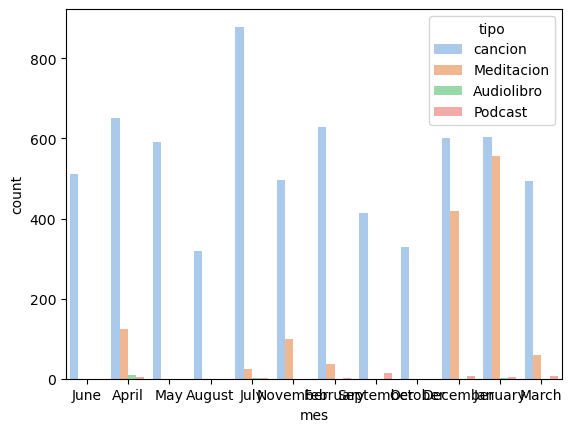

In [325]:
sns.countplot(data = df_CONS_45, x = 'mes', hue = 'tipo', palette= 'pastel')